In [2]:
import geopandas as gpd 
import matplotlib.pyplot as plt

df = gpd.read_file('../formatted_SA2.geojson')

In [4]:
import pandas as pd 
main_table = pd.read_csv("Median_age") 
main_table.head()

,Time,Value,Code,Area
0,2013,34.1,127031522,Casula
1,2014,34.2,127031522,Casula
2,2015,34.2,127031522,Casula
3,2016,34.3,127031522,Casula
4,2017,34.3,127031522,Casula


In [5]:
main_table=main_table[main_table.Time == 2016]
main_table.head()

,Time,Value,Code,Area
3,2016,34.3,127031522,Casula
8,2016,33.9,118011340,Bondi Beach - North Bondi
13,2016,41.4,115011558,Cherrybrook
18,2016,39.3,121021403,Asquith - Mount Colah
23,2016,36.9,120021388,Leichhardt - Annandale


In [6]:
df = df[['sa2_maincode_2016','geometry']]

df.head()

,sa2_maincode_2016,geometry
0,124031461,"POLYGON ((150.668015306 -33.75867972099996, 15..."
1,110021194,"POLYGON ((151.957926 -28.51592999699994, 151.9..."
2,124041468,"POLYGON ((150.695831007 -33.60961500899998, 15..."
3,111021217,POLYGON ((151.6008459520001 -32.88926030699997...
4,103021062,POLYGON ((146.0950879860001 -33.27617800199994...


In [7]:
df = df.drop([576,577], axis=0)
#576, 577 refer to row number

In [8]:
df.sort_values(by=['sa2_maincode_2016'], inplace=True)
#Sorts streamlines geopackage dataframe by the values in sa2_maincode_2016. Descending order by default

main_table.sort_values(by=['Code'], inplace=True)
#Does the same for census dataframe by Code column

#This ensures that they match up when we merge them!

In [9]:
df = df.reset_index(drop=True)
df.head()

,sa2_maincode_2016,geometry
0,101021007,POLYGON ((149.5683748780001 -36.00876168299993...
1,101021008,POLYGON ((149.2562689990001 -35.39015000699993...
2,101021009,"POLYGON ((149.219204016 -35.36011499699998, 14..."
3,101021010,"POLYGON ((149.23877298 -35.36226199699996, 149..."
4,101021011,POLYGON ((149.7606489940001 -35.08347800399997...


In [10]:
code_list = main_table.Code.unique()
print (code_list)

[115011290 115011291 115011294 115011296 115011553 115011554 115011555
 115011556 115011557 115011558 115011559 115021297 115021298 115031299
 115031300 115041301 115041302 116011303 116011304 116011306 116011307
 116011308 116011560 116011561 116021309 116021310 116021312 116021562
 116021563 116031313 116031314 116031315 116031316 116031317 116031318
 116031319 117011320 117011321 117011322 117011323 117011324 117011325
 117021326 117021327 117021328 117031329 117031330 117031331 117031332
 117031333 117031334 117031335 117031336 117031337 117031338 118011339
 118011340 118011341 118011342 118011343 118011344 118011345 118011346
 118011347 118021348 118021350 118021564 118021565 118021566 118021567
 118021568 118021569 118021570 119011354 119011355 119011356 119011357
 119011358 119011359 119011360 119011361 119011571 119011572 119021362
 119021363 119021364 119021366 119021367 119021573 119021574 119031368
 119031369 119031370 119031371 119031372 119031373 119031374 119041375
 11904

In [11]:
code_list=[str(i) for i in code_list]

print(code_list)

['115011290', '115011291', '115011294', '115011296', '115011553', '115011554', '115011555', '115011556', '115011557', '115011558', '115011559', '115021297', '115021298', '115031299', '115031300', '115041301', '115041302', '116011303', '116011304', '116011306', '116011307', '116011308', '116011560', '116011561', '116021309', '116021310', '116021312', '116021562', '116021563', '116031313', '116031314', '116031315', '116031316', '116031317', '116031318', '116031319', '117011320', '117011321', '117011322', '117011323', '117011324', '117011325', '117021326', '117021327', '117021328', '117031329', '117031330', '117031331', '117031332', '117031333', '117031334', '117031335', '117031336', '117031337', '117031338', '118011339', '118011340', '118011341', '118011342', '118011343', '118011344', '118011345', '118011346', '118011347', '118021348', '118021350', '118021564', '118021565', '118021566', '118021567', '118021568', '118021569', '118021570', '119011354', '119011355', '119011356', '119011357'

In [114]:
print(len(code_list))

281


In [12]:
newdf= df[df['sa2_maincode_2016'].isin(code_list)]

newdf.head()

,sa2_maincode_2016,geometry
294,115011290,POLYGON ((150.9842678770001 -33.74086259299997...
295,115011291,"POLYGON ((150.963686841 -33.76555718899994, 15..."
296,115011294,POLYGON ((151.0247176150001 -33.71035546399998...
297,115011296,"POLYGON ((151.024766416 -33.73216461499993, 15..."
298,115011553,POLYGON ((150.9842678770001 -33.74086259299997...


In [14]:
newdf2 = newdf.reset_index(drop=True)
main_table = main_table.reset_index(drop=True)
#Reset index values, not completely necessary but it doesn't like it when they are different

final_table = pd.concat([newdf2, main_table], axis=1)
#Join line! Note: axis=1 puts them next not each other rather than below like axis=0 which is default

In [15]:
def add_centroid(row):
    return row.geometry.centroid

final_table["centroid"] = final_table.apply(add_centroid, axis=1)

In [16]:
final_table

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid
0,115011290,POLYGON ((150.9842678770001 -33.74086259299997...,2016,37.8,115011290,Baulkham Hills (East),POINT (150.9880403155173 -33.75998530617206)
1,115011291,"POLYGON ((150.963686841 -33.76555718899994, 15...",2016,37.9,115011291,Baulkham Hills (West) - Bella Vista,POINT (150.9644738915324 -33.74240788684786)
2,115011294,POLYGON ((151.0247176150001 -33.71035546399998...,2016,44.7,115011294,Glenhaven,POINT (150.9988456434462 -33.70211054829612)
3,115011296,"POLYGON ((151.024766416 -33.73216461499993, 15...",2016,40.5,115011296,West Pennant Hills,POINT (151.0302968230872 -33.74999153231416)
4,115011553,POLYGON ((150.9842678770001 -33.74086259299997...,2016,37.3,115011553,Castle Hill - Central,POINT (150.9878864003637 -33.73359129225526)
5,115011554,POLYGON ((151.0189927360001 -33.71687604799996...,2016,50.3,115011554,Castle Hill - East,POINT (151.0241909555199 -33.722426879346)
6,115011555,POLYGON ((151.0189927360001 -33.71687604799996...,2016,41.1,115011555,Castle Hill - North,POINT (150.9994784668464 -33.71997103973066)
7,115011556,"POLYGON ((151.023674409 -33.73226160999997, 15...",2016,38.3,115011556,Castle Hill - South,POINT (151.0096544460887 -33.74163315785673)
8,115011557,POLYGON ((150.9637148730001 -33.71967217499997...,2016,46.4,115011557,Castle Hill - West,POINT (150.9748767926909 -33.71887703201253)
9,115011558,"POLYGON ((151.058057993 -33.71923600099996, 15...",2016,41.4,115011558,Cherrybrook,POINT (151.0461341747868 -33.72196327242823)


In [102]:
final_table = final_table.drop([58], axis=0)

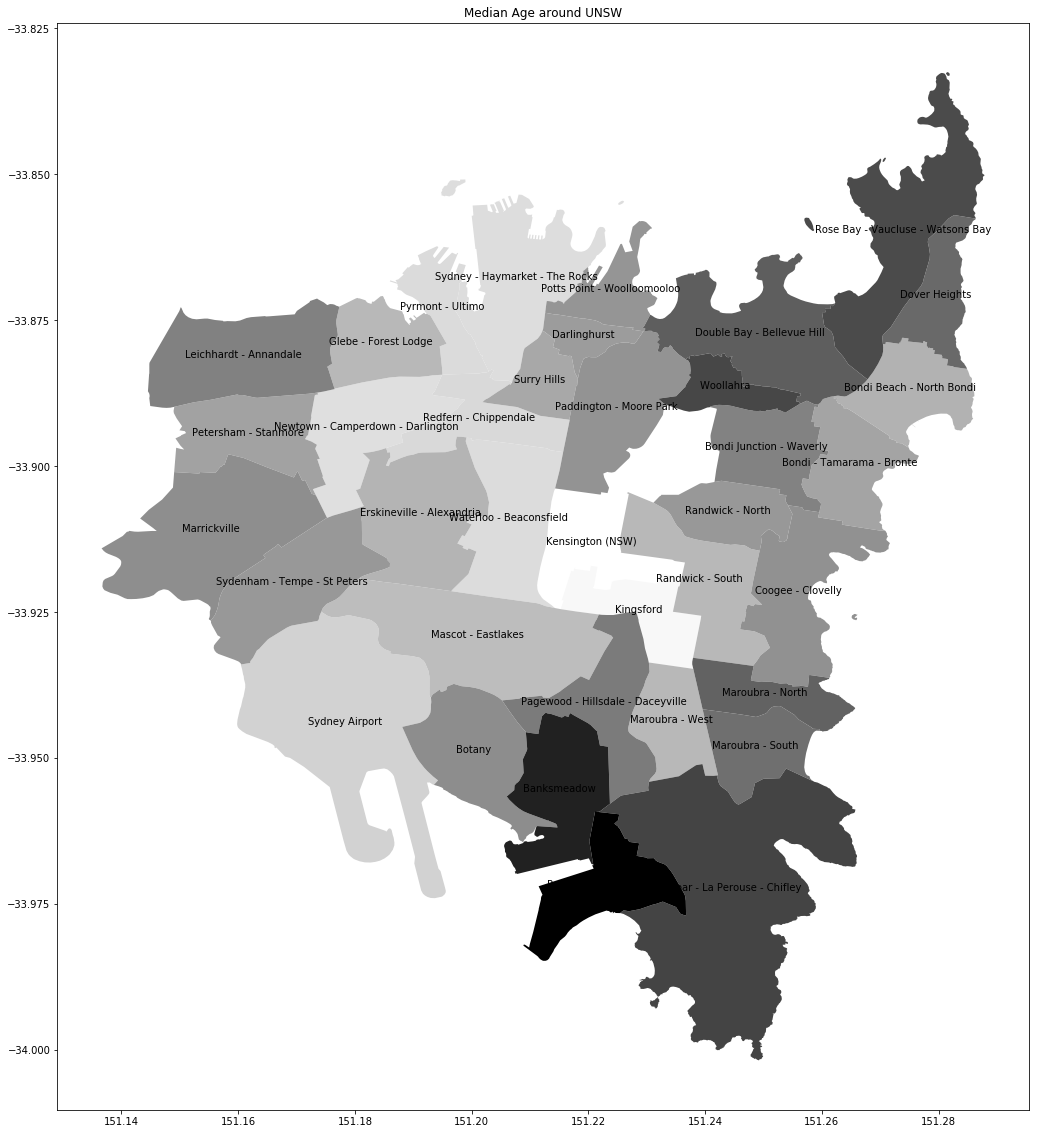

In [108]:
import shapely

plt.rcParams["figure.figsize"] = (40,20)

right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
final_table["distance_from_UNSW"] = final_table.geometry.distance(right_here)

really_close_burbs = final_table[final_table.distance_from_UNSW<0.065]
really_close_burbs.plot(column='Value', cmap='Greys')

for idx, row in really_close_burbs.iterrows():
    plt.annotate(s=row.Area, 
                 xy=tuple(row.centroid.coords)[0],
                 horizontalalignment='center')
    
plt.title("Median Age around UNSW");

In [28]:
final_table.Value.idxmax()

180

In [29]:
final_table.loc[final_table['Value'].idxmax()]

sa2_maincode_2016                                             124021456
geometry              POLYGON ((150.5267630070001 -33.71471600699994...
Time                                                               2016
Value                                                              57.5
Code                                                          124021456
Area                                            Blue Mountains - South 
centroid                   POINT (150.2879512804046 -33.99342565865368)
distance_from_UNSW                                             0.602966
Name: 180, dtype: object

In [30]:
qdf = final_table.drop([180], axis=0)

In [31]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             118011342
geometry              POLYGON ((151.2337154470001 -33.88963617099995...
Time                                                               2016
Value                                                              50.5
Code                                                          118011342
Area                                                   Centennial Park 
centroid                    POINT (151.2342531103935 -33.8983611702745)
distance_from_UNSW                                            0.0116502
Name: 58, dtype: object

In [40]:
qdf = final_table.drop([58,180], axis=0)

In [41]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             115011554
geometry              POLYGON ((151.0189927360001 -33.71687604799996...
Time                                                               2016
Value                                                              50.3
Code                                                          115011554
Area                                                Castle Hill - East 
centroid                     POINT (151.0241909555199 -33.722426879346)
distance_from_UNSW                                             0.276107
Name: 5, dtype: object

In [42]:
qdf = final_table.drop([58,180,5], axis=0)

In [43]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             124011449
geometry              POLYGON ((150.2767896180001 -33.49917994399993...
Time                                                               2016
Value                                                              49.1
Code                                                          124011449
Area                                      Blackheath - Megalong Valley 
centroid                   POINT (150.2455170225261 -33.67384766520153)
distance_from_UNSW                                             0.947228
Name: 173, dtype: object

In [44]:
qdf = final_table.drop([58,180,5,173], axis=0)

In [45]:
qdf.loc[qdf['Value'].idxmax()]

sa2_maincode_2016                                             124011455
geometry              POLYGON ((150.352112989 -33.71381999599998, 15...
Time                                                               2016
Value                                                              49.1
Code                                                          124011455
Area                                                   Wentworth Falls 
centroid                   POINT (150.3797300427459 -33.72168262852624)
distance_from_UNSW                                             0.844639
Name: 179, dtype: object

In [48]:
top10= final_table.nlargest(10, ['Value']) 

In [50]:
top10

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid,distance_from_UNSW
180,124021456,POLYGON ((150.5267630070001 -33.71471600699994...,2016,57.5,124021456,Blue Mountains - South,POINT (150.2879512804046 -33.99342565865368),0.602966
58,118011342,POLYGON ((151.2337154470001 -33.88963617099995...,2016,50.5,118011342,Centennial Park,POINT (151.2342531103935 -33.8983611702745),0.011650
5,115011554,POLYGON ((151.0189927360001 -33.71687604799996...,2016,50.3,115011554,Castle Hill - East,POINT (151.0241909555199 -33.722426879346),0.276107
173,124011449,POLYGON ((150.2767896180001 -33.49917994399993...,2016,49.1,124011449,Blackheath - Megalong Valley,POINT (150.2455170225261 -33.67384766520153),0.947228
179,124011455,"POLYGON ((150.352112989 -33.71381999599998, 15...",2016,49.1,124011455,Wentworth Falls,POINT (150.3797300427459 -33.72168262852624),0.844639
256,127021521,"POLYGON ((150.876429138 -33.84928822599994, 15...",2016,49.0,127021521,Wetherill Park Industrial,POINT (150.8986227870217 -33.84043962922477),0.315039
176,124011452,"POLYGON ((150.282176982 -33.73232199399996, 15...",2016,47.2,124011452,Katoomba - Leura,POINT (150.3093220200945 -33.70267551090872),0.893583
8,115011557,POLYGON ((150.9637148730001 -33.71967217499997...,2016,46.4,115011557,Castle Hill - West,POINT (150.9748767926909 -33.71887703201253),0.315354
146,122021421,"(POLYGON ((151.286808238 -33.63778205499995, 1...",2016,46.4,122021421,Bayview - Elanora Heights,POINT (151.2663348341949 -33.63316975057209),0.210284
13,115031299,POLYGON ((150.6106874930001 -33.06613728999997...,2016,46.2,115031299,Bilpin - Colo - St Albans,POINT (150.782944668733 -33.2707922839657),0.551676


In [52]:
top10.set_index("Area",drop=True,inplace=True)

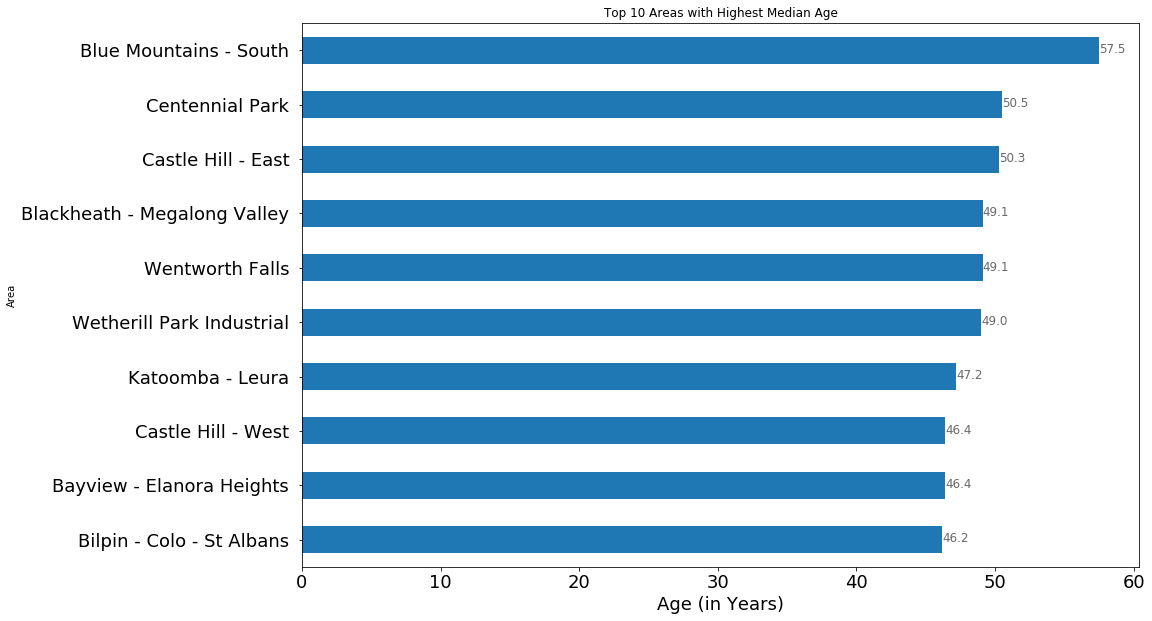

In [124]:
import matplotlib.pyplot as plt
ax = top10['Value'].plot(kind='barh', title ="Top 10 Areas with Highest Median Age", figsize=(15, 10), legend=False, fontsize=18)
ax.set_xlabel("Age (in Years)", fontsize=18)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.3, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')
ax.invert_yaxis()
plt.show()

In [54]:
bot10= final_table.nsmallest(10, ['Value']) 

In [55]:
bot10

,sa2_maincode_2016,geometry,Time,Value,Code,Area,centroid,distance_from_UNSW
66,118021564,POLYGON ((151.2225498050001 -33.90130016199998...,2016,26.5,118021564,Kensington (NSW),POINT (151.2207506276802 -33.91337617759051),0.000000
67,118021565,POLYGON ((151.2359737380001 -33.91904537999994...,2016,27.5,118021565,Kingsford,POINT (151.228965309437 -33.92515779356199),0.002014
200,125011583,"POLYGON ((151.019162023 -33.83734299799994, 15...",2016,29.8,125011583,Auburn - North,POINT (151.0327580965876 -33.84242992020696),0.200374
199,125011582,POLYGON ((151.0375447370001 -33.85518807899996...,2016,29.9,125011582,Auburn - Central,POINT (151.0250128521681 -33.85234667103278),0.199711
32,116031316,POLYGON ((150.7671435750001 -33.71415752799993...,2016,30.1,116031316,Lethbridge Park - Tregear,POINT (150.7882268582722 -33.73186478490537),0.454241
48,117031332,POLYGON ((151.1735695420001 -33.88743098899995...,2016,30.4,117031332,Newtown - Camperdown - Darlington,POINT (151.1822435039629 -33.8937979459832),0.042270
74,119011355,"POLYGON ((151.052038011 -33.88519374699996, 15...",2016,30.5,119011355,Chullora,POINT (151.0439904891038 -33.89266249670278),0.166680
53,117031337,"(POLYGON ((151.225378993 -33.85526500199995, 1...",2016,30.6,117031337,Sydney - Haymarket - The Rocks,POINT (151.2079614856675 -33.86808462024548),0.039502
29,116031313,POLYGON ((150.8014519330001 -33.74896300299997...,2016,30.7,116031313,Bidwill - Hebersham - Emerton,POINT (150.8181296950722 -33.74071859625557),0.435144
54,117031338,POLYGON ((151.1991193230001 -33.89516435899998...,2016,30.7,117031338,Waterloo - Beaconsfield,POINT (151.2066636218935 -33.90925525425694),0.016981


In [56]:
bot10.set_index("Area",drop=True,inplace=True)

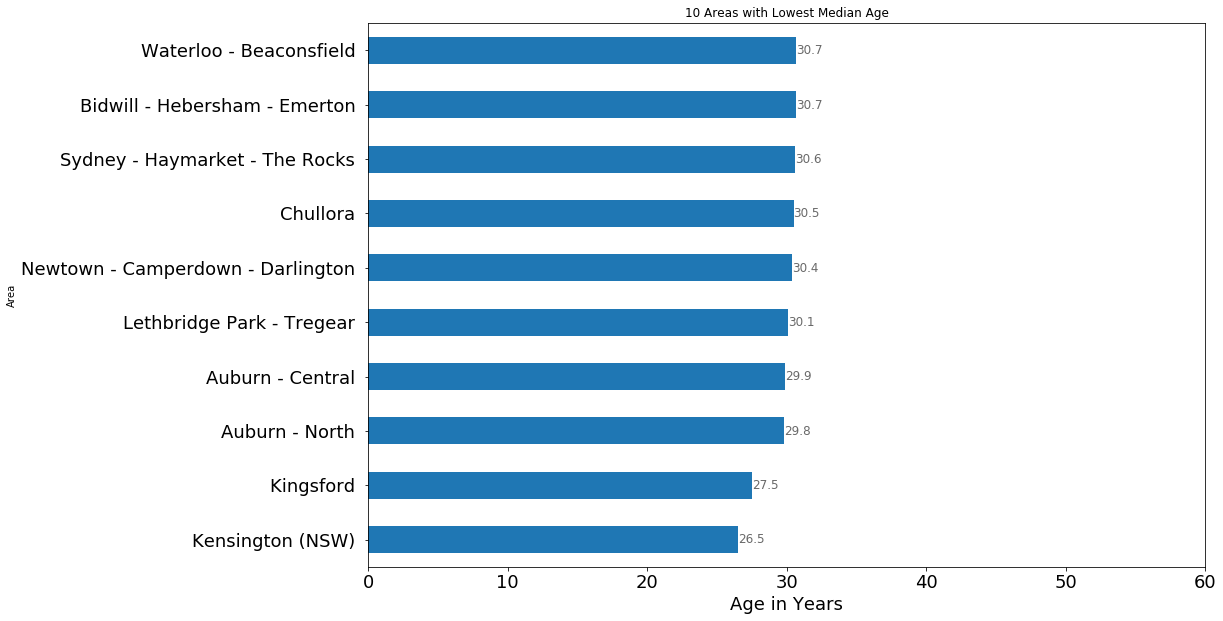

In [119]:
import matplotlib.pyplot as plt
ax = bot10['Value'].plot(kind='barh', title ="10 Areas with Lowest Median Age", figsize=(15, 10), legend=False, fontsize=18)
ax.set_xlabel("Age in Years", fontsize=18)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60])

for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+.18, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')

plt.show()

In [77]:
final_table.sort_values(by=['Value'], inplace=True)

In [78]:
top50= final_table.nlargest(50, ['Value']) 

In [80]:
top50.set_index("Area",drop=True,inplace=True)

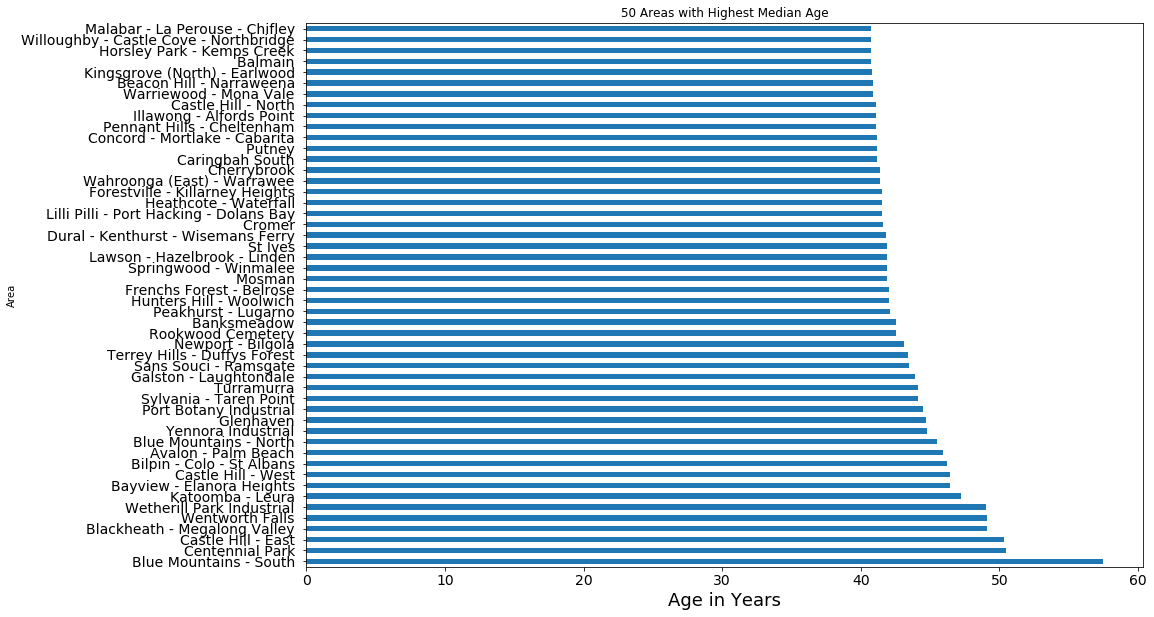

In [82]:
import matplotlib.pyplot as plt
ax = top50['Value'].plot(kind='barh', title ="50 Areas with Highest Median Age", figsize=(15, 10), legend=False, fontsize=14)
ax.set_xlabel("Age in Years", fontsize=18)
plt.show()

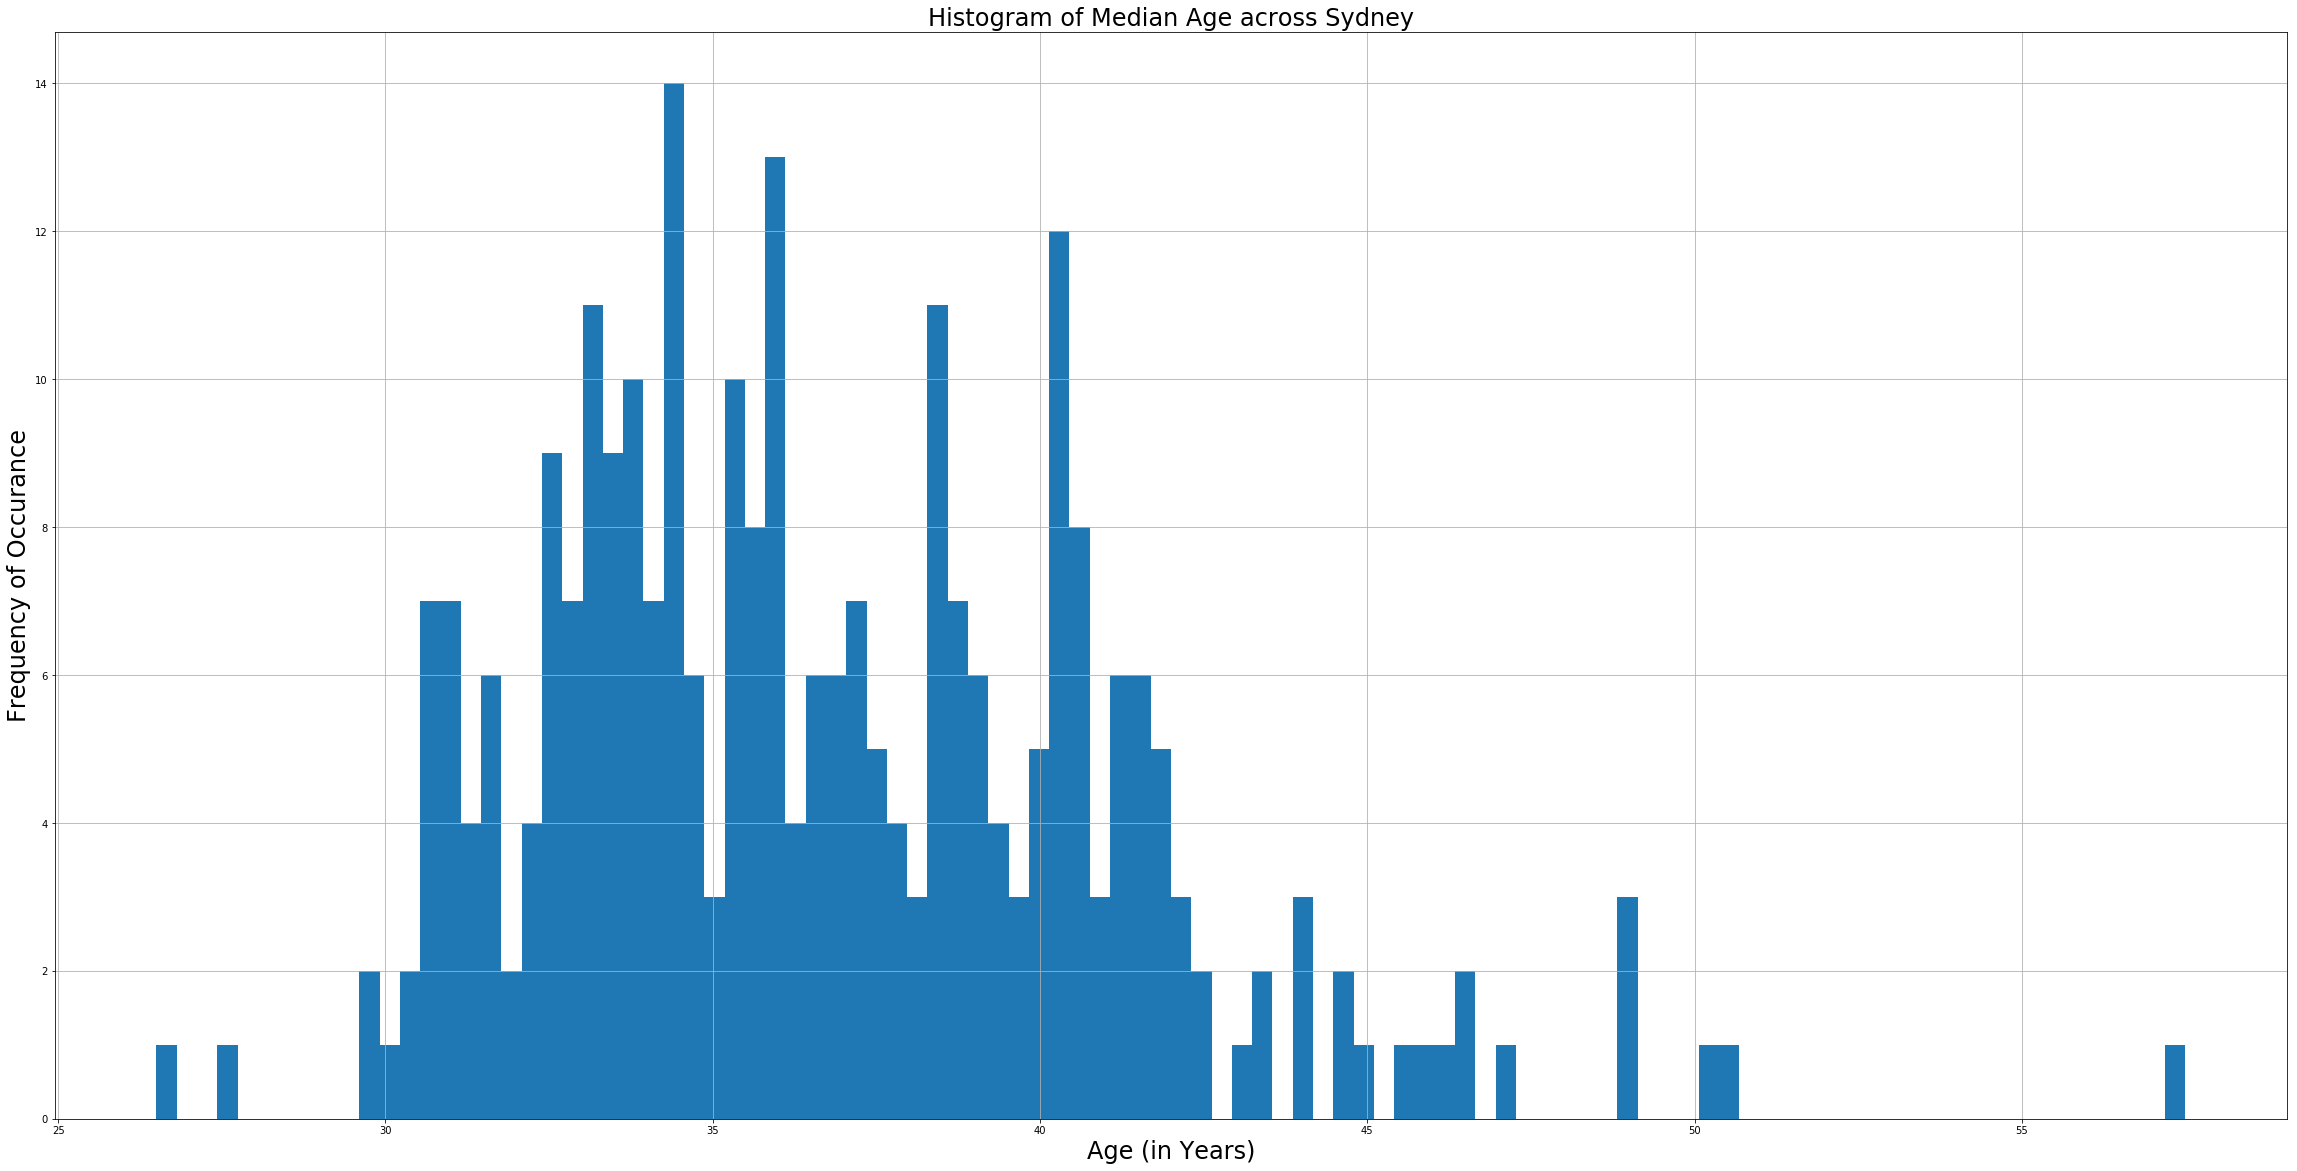

In [86]:
final_table.Value.hist(bins=100)

plt.xlabel("Age (in Years)",fontsize=24)
plt.ylabel("Frequency of Occurance",fontsize=24)
plt.title("Histogram of Median Age across Sydney",fontsize=24);